In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.sample(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2841,flat,antriksh heights,sector 84,0.9,4444.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,3,"servant room,pooja room",18.0,NaN,1 to 5 Year Old,"['Old Bengali Market', 'MatriKiran High School', 'Society Park']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [5]:
df.duplicated().sum()

122

In [6]:
# focus on areaWithType, additionalRoom, agePossession, furnishDetails,features

# 1.areaWithType

In [7]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1072,0.50,540.0,Plot area 540(50.17 sq.m.)
2142,2.75,1557.0,Plot area 173(144.65 sq.m.)
1764,1.60,2120.0,Super Built up area 2120(196.95 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.)
1142,10.75,3600.0,Plot area 400(334.45 sq.m.)
1025,NaN,NaN,Plot area 500(418.06 sq.m.)


In [8]:
# this function extracts the super built up area
def get_super_built_up_area(text):
    match=re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    else:
        return None

In [9]:
def get_area(text,area_type):
    match=re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [10]:
def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match=re.search(r'{}\s?\((\d+\.?\d* sq.m)\)'.format(area_value),text)
    if match:
        sq_m_value=float(match.group(1).split()[0])
        return sq_m_value*10.7639 # conversion factor from sq.m to sq.ft
    return area_value
        

In [11]:
df['super_built_up_area']=df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area']=df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis=1)

In [12]:
df['built_up_area']=df['areaWithType'].apply(lambda x: get_area(x,'Built Up area'))
df['built_up_area']=df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['built_up_area']),axis=1)

In [13]:
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [14]:
df.sample(5)[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2312,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
3792,0.31,flat,525.0,Carpet area: 525 (48.77 sq.m.),NaN,NaN,525.0
3657,2.54,flat,1639.0,Carpet area: 1640 (152.36 sq.m.),NaN,NaN,1640.0
795,1.50,flat,1811.0,Super Built up area 1811(168.25 sq.m.)Carpet area: 1570 sq.ft. (145.86 sq.m.),1811.0,NaN,1570.0
626,1.10,flat,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),1741.0,NaN,1218.0


In [15]:
df[~((df['super_built_up_area'].isnull())|(df['built_up_area'].isnull())|(df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [16]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2681,1.90,house,540.0,Plot area 60(50.17 sq.m.)Built Up area: 60 sq.yards (50.17 sq.m.),NaN,60.0,NaN
1157,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,NaN,NaN
1409,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
3340,4.70,house,2368.0,Plot area 220Built Up area: 170 sq.m.Carpet area: 160 sq.m.,NaN,170.0,160.0
1143,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,NaN,NaN


In [17]:
all_nan_df=df[(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())& (df['carpet_area'].isnull())][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [18]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
23,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,NaN,NaN
25,5.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
28,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [19]:
all_nan_df_index=df[(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())& (df['carpet_area'].isnull())][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [20]:
all_nan_df_index

Int64Index([  14,   23,   25,   26,   28,   30,   41,   42,   46,   82,
            ...
            3735, 3749, 3770, 3774, 3785, 3789, 3791, 3793, 3795, 3798],
           dtype='int64', length=546)

In [21]:
def extract_Plot_area(text):
    match=re.search(r'Plot area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    else:
        return None

In [22]:
all_nan_df['built_up_area']=all_nan_df['areaWithType'].apply(extract_Plot_area)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
23,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,107.00,NaN
25,5.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
28,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
30,20.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
41,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
42,1.40,house,1700.0,Plot area 1700(157.94 sq.m.),NaN,1700.00,NaN
46,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
82,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.00,NaN


In [24]:
def convert_scale(area,built_up_area):
    if np.isnan(area) or np.isnan(built_up_area):
        return built_up_area
    elif round(area/built_up_area)==9.0: # this convert the sq.yeard to sq.feet
        return built_up_area*9
    elif round(area/built_up_area)==11.0: # this convert the sq.mt to sq.feet
        return built_up_area*10.7
    else:
        return built_up_area # this is already in sq.feet

In [25]:
all_nan_df['built_up_area']=all_nan_df.apply(lambda row:convert_scale(row['area'],row['built_up_area']),axis=1)

In [26]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
23,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,963.00,NaN
25,5.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,2300.50,NaN
28,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
30,20.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
41,3.20,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
42,1.40,house,1700.0,Plot area 1700(157.94 sq.m.),NaN,1700.00,NaN
46,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
82,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.00,NaN


In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [28]:
df.update(all_nan_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,indiabulls centrum park,sector 103,2.20,7652.0,2875.0,Super Built up area 2875(267.1 sq.m.),4,6,3+,servant room,4.0,North-East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['3 Wardrobe', '8 Fan', '3 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '4 AC', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2875.0,NaN,NaN
1,flat,adani brahma samsara vilasa,sector 63,3.25,29545.0,1100.0,Built Up area: 2700 (250.84 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,others,4.0,North-East,0 to 1 Year Old,"['Rapid Metro Station Sector 56', 'Paras Trinity Mall Sector 63', 'Golf Course Ext Rd', 'Mehrauli-Gurgaon Road', 'Nirvana Rd', 'Heritage Xperiential Learning School', 'KIIT College of Engineering Sohna Road', 'CK Birla Hospital', 'Indira Gandhi International Airport', 'AIPL Business Club Sector 62', 'DoubleTree by Hilton Hotel Gurgaon', 'De Adventure Park', 'TERI Golf Course']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking']",NaN,2700.0,1100.0
2,flat,tulip monsella,sector 53,7.40,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,not available,21.0,NaN,2027-06-01 00:00:00,"['Sector 53-54 Metro Station', 'Central Plaza Mall', 'The Big Tree Cafe', 'IILM University, Gurugram', 'The Banyan Tree World School', 'Sanar International Hospital', 'DLF Golf and Country Club', 'Mavens Inn', 'DoubleTree by Hilton Hotel']","['1 Wardrobe', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,2229.0
3,flat,raheja vedaanta,sector 108,1.00,4854.0,2060.0,Built Up area: 2060 (191.38 sq.m.)Carpet area: 1890 sq.ft. (175.59 sq.m.),2,2,2,not available,0.0,North,undefined,NaN,NaN,NaN,NaN,2060.0,1890.0
4,flat,smart world orchard,sector 61,2.41,14785.0,1630.0,Built Up area: 1630 (151.43 sq.m.)Carpet area: 1625 sq.ft. (150.97 sq.m.),3,3,3,not available,2.0,East,Within 3 months,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'Emaar Digital Greens Tower A', 'Grand Hyatt Gurgaon', ""Oyster's Water Park"", 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['1 Exhaust Fan', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No 

# 2.Additional Room

In [31]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [32]:
# additional room
# list of all different additional room
new_cols=["study room","pooja room","store room","servant room","others"]

for col in new_cols:
    df[col]=df['additionalRoom'].str.contains(col).astype(int)

In [33]:
df.sample(5)[["additionalRoom","study room","pooja room","store room","servant room","others"]]

,additionalRoom,study room,pooja room,store room,servant room,others
2230,study room,1,0,0,0,0
3406,not available,0,0,0,0,0
3575,"pooja room,store room,study room,servant room",1,1,1,1,0
3751,not available,0,0,0,0,0
2107,not available,0,0,0,0,0


In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others
0,flat,indiabulls centrum park,sector 103,2.20,7652.0,2875.0,Super Built up area 2875(267.1 sq.m.),4,6,3+,servant room,4.0,North-East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['3 Wardrobe', '8 Fan', '3 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '4 AC', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2875.0,NaN,NaN,0,0,0,1,0
1,flat,adani brahma samsara vilasa,sector 63,3.25,29545.0,1100.0,Built Up area: 2700 (250.84 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,others,4.0,North-East,0 to 1 Year Old,"['Rapid Metro Station Sector 56', 'Paras Trinity Mall Sector 63', 'Golf Course Ext Rd', 'Mehrauli-Gurgaon Road', 'Nirvana Rd', 'Heritage Xperiential Learning School', 'KIIT College of Engineering Sohna Road', 'CK Birla Hospital', 'Indira Gandhi International Airport', 'AIPL Business Club Sector 62', 'DoubleTree by Hilton Hotel Gurgaon', 'De Adventure Park', 'TERI Golf Course']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking']",NaN,2700.0,1100.0,0,0,0,0,1
2,flat,tulip monsella,sector 53,7.40,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,not available,21.0,NaN,2027-06-01 00:00:00,"['Sector 53-54 Metro Station', 'Central Plaza Mall', 'The Big Tree Cafe', 'IILM University, Gurugram', 'The Banyan Tree World School', 'Sanar International Hospital', 'DLF Golf and Country Club', 'Mavens Inn', 'DoubleTree by Hilton Hotel']","['1 Wardrobe', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,2229.0,0,0,0,0,0
3,flat,raheja vedaanta,sector 108,1.00,4854.0,2060.0,Built Up area: 2060 (191.38 sq.m.)Carpet area: 1890 sq.ft. (175.59 sq.m.),2,2,2,not available,0.0,North,undefined,NaN,NaN,NaN,NaN,2060.0,1890.0,0,0,0,0,0
4,flat,smart world orchard,sector 61,2.41,14785.0,1630.0,Built Up area: 1630 (151.43 sq.m.)Carpet area: 1625 sq.ft. (150.97 sq.m.),3,3,3,not available,2.0,East,Within 3 months,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'Emaar Digital Greens Tower A', 'Grand Hyatt Gurgaon', ""Oyster's Water Park"", 'TERI Golf Course', 'Tau DeviLal Sports Complex']","['1 Exhaust Fan', '1 Light', '1 Modul

In [35]:
df['agePossession'].value_counts()

1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2025-12-01 00:00:00       7
2024-06-01 00:00:00       7
2023-08-01 00:00:00       7
2023-11-01 00:00:00       5
2023-10-01 00:00:00       4
By 2025                   4
2024-07-01 00:00:00       4
2023-09-01 00:00:00       4
2024-08-01 00:00:00       4
2024-05-01 00:00:00       3
2024-02-01 00:00:00       3
2024-11-01 00:00:00       3
2025-01-01 00:00:00       3
By 2027                   2
2027-07-01 00:00:00       2
2026-12-01 00:00:00       2
2027-06-01 00:00:00       2
2025-08-01 00:00:00       2
2025-03-01 00:00:00       2
2025-09-01 00:00:00       2
2025-07-01 00:00:00 

# 3.agePossession

In [36]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        pd.to_datetime(value)
        return "Under Construction"
    except:
        return "Undefined"

In [37]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [38]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

# 4.furnishDetails

In [39]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3706,NaN,NaN
1883,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage']"
3022,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1616,"['1 Exhaust Fan', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'Park', 'Rain Water Harvesting']"
973,"['1 Water Purifier', '20 Fan', '1 Exhaust Fan', '16 Geyser', '1 Stove', '62 Light', '12 AC', '1 Modular Kitchen', '1 Chimney', '21 Wardrobe', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Security Personnel', 'Waste Disposal', 'Rain Water Harvesting']"


In [40]:
all_furnishings=[]
for details in df['furnishDetails'].dropna():
    furnishing=details.replace('[','').replace(']','').replace("'",'').split(', ')
    all_furnishings.extend(furnishing)
unique_furnishing=list(set(all_furnishings))
#print(unique_furnishing)


#print(columns_to_include)

def get_furnishing_count(details,furnishing):
    if isinstance(details,str):
        if f'No {furnishing}' in details:
            return 0
        pattern=re.compile(f'(\d+) {furnishing}')
        match=pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include=[re.sub(r'No|\d+','',furnishing).strip() for furnishing in unique_furnishing]
columns_to_include=list(set(columns_to_include))
columns_to_include=[furnishing for furnishing in columns_to_include if furnishing]

for furnishing in columns_to_include:
    df[furnishing]=df['furnishDetails'].apply(lambda x: get_furnishing_count(x,furnishing))
    
# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [41]:
furnishings_df.shape

(3803, 19)

In [42]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2172\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [43]:
furnishings_df.sample(5)

,Exhaust Fan,Dining Table,Water Purifier,TV,Modular Kitchen,Washing Machine,Stove,Fan,Bed,Geyser,Wardrobe,Chimney,Curtains,AC,Sofa,Fridge,Microwave,Light
840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2558,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2480,1,0,0,0,1,0,0,1,0,1,1,1,0,3,0,0,0,1
1777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(furnishings_df)

In [46]:
#conda update scikit-learn threadpoolctl


In [47]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

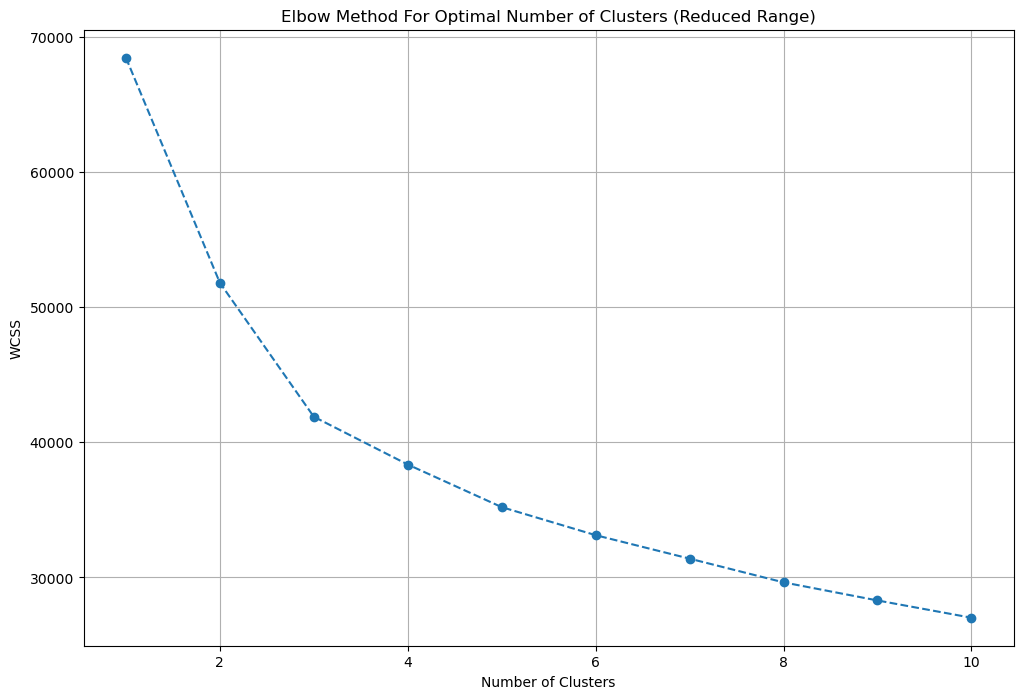

In [48]:
# plot the results
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [49]:
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignment=kmeans.predict(scaled_data)

In [50]:
df = df.iloc[:,:-18]

In [51]:
df['furnishing_type'] = cluster_assignment

In [52]:
df['furnishing_type'] = df['furnishing_type'].replace({1: 0, 0: 2, 2: 1})

In [53]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1263,"['4 Geyser', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1075,"['1 Water Purifier', '9 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '9 Geyser', '1 Stove', '9 Light', '9 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '9 Bed', '9 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No TV']",1
3109,[],0
3579,"['1 Water Purifier', '9 Fan', '1 Exhaust Fan', '6 Geyser', '44 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",2
1135,NaN,0


In [54]:
df['features'].isnull().sum()

635

In [55]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [56]:
app_df['PropertyName']=app_df['PropertyName'].str.lower()

In [57]:
temp_df=df[df['features'].isnull()]

In [58]:
temp_df.shape

(635, 26)

In [59]:
x=temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [60]:
df.loc[temp_df.index,'features'] = x.values

In [61]:
df['features'].isnull().sum()

500

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [63]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [64]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Toddler Pool,Valet Parking,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3659,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,features_list,luxury_score
0,flat,indiabulls centrum park,sector 103,2.20,7652.0,2875.0,Super Built up area 2875(267.1 sq.m.),4,6,3+,servant room,4.0,North-East,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['3 Wardrobe', '8 Fan', '3 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '4 AC', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2875.0,NaN,NaN,0,0,0,1,0,2,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",108
1,flat,adani brahma samsara vilasa,sector 63,3.25,29545.0,1100.0,Built Up area: 2700 (250.84 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,others,4.0,North-East,New Property,"['Rapid Metro Station Sector 56', 'Paras Trinity Mall Sector 63', 'Golf Course Ext Rd', 'Mehrauli-Gurgaon Road', 'Nirvana Rd', 'Heritage Xperiential Learning School', 'KIIT College of Engineering Sohna Road', 'CK Birla Hospital', 'Indira Gandhi International Airport', 'AIPL Business Club Sector 62', 'DoubleTree by Hilton Hotel Gurgaon', 'De Adventure Park', 'TERI Golf Course']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking']",NaN,2700.0,1100.0,0,0,0,0,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Visitor Parking]",41
2,flat,tulip monsella,sector 53,7.40,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,not available,21.0,NaN,Under Construction,"['Sector 53-54 Metro Station', 'Central Plaza Mall', 'The Big Tree Cafe', 'IILM University, Gurugram', 'The Banyan Tree World School', 'Sanar International Hospital', 'DLF Golf and Country Club', 'Mavens Inn', 'DoubleTree by Hilton Hotel']","['1 Wardrobe', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,2229.0,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Lift(s), Swimming Pool, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",35
3,flat,raheja vedaanta,sect

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
3547,flat,shree vardhman victoria,sector 70,1.55,7948.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,5,3,8.0,South,Relatively New,1950.0,NaN,1161.00,0,0,0,1,0,0,174
2210,flat,signature global park,sohna road,0.54,6388.0,845.0,Super Built up area 845.3(78.53 sq.m.)Carpet area: 528.3 sq.ft. (49.08 sq.m.),2,2,3,4.0,East,New Property,845.3,NaN,528.30,0,0,0,0,0,0,44
2323,house,dlf city plots,sector 26,13.50,29880.0,4518.0,Plot area 502(419.74 sq.m.),5,5,3,2.0,East,Old Property,NaN,4518.00,NaN,1,1,1,1,0,2,110
988,flat,mapsko royale ville,sector 82,1.12,6256.0,1790.0,Super Built up area 1790(166.3 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,2,12.0,North-East,Relatively New,1790.0,NaN,1400.00,0,1,0,0,0,2,49
2345,flat,ashiana mulberry,sohna road,1.05,5412.0,1940.0,Super Built up area 1940(180.23 sq.m.)Built Up area: 1175.97 sq.ft. (109.25 sq.m.)Carpet area: 834.96 sq.ft. (77.57 sq.m.),2,2,3,1.0,North,New Property,1940.0,1175.97,834.96,1,0,0,0,0,0,49


In [70]:
df.shape

(3803, 23)

In [72]:
df.to_csv('gurgaon_properties_cleaned_v2_updated.csv',index=False)